In [1]:
setwd("C:/Users/kriti_dutta/Desktop/Data analysis")

In [2]:
train=read.csv('train_loan.csv')
test=read.csv('test_loan.csv')

In [3]:
head(train)

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
LP001002,Male,No,0,Graduate,No,5849,0,NA,360,1,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y


Since following dataset contains Character value of columns like Gender etc, we need to change it into numeric value

In [4]:
levels(train$Gender)


[1] ""       "Female" "Male"

In [5]:
levels(train$Gender)[1]=NA
levels(train$Gender)[1]=1
levels(train$Gender)[2]=0



In [6]:
levels(train$Gender)

[1] "1" "0"

'''Like this we will change the columns like Education,Loan_Status,Married,SelfEmployed,Property area

Now I am loading an alredy cleaned dataset of train and test '''

In [7]:
train=read.csv('loan_train.csv')
test=read.csv('loan_test.csv')

In [8]:
head(train)

X.1,X,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,LP001002,0,0,0,1,0,5849,0,141,360,1,2,1
2,2,LP001003,0,1,1,1,0,4583,1508,128,360,1,0,0
3,3,LP001005,0,1,0,1,1,3000,0,66,360,1,2,1
4,4,LP001006,0,1,0,0,0,2583,2358,120,360,1,2,1
5,5,LP001008,0,0,0,1,0,6000,0,141,360,1,2,1
6,6,LP001011,0,1,2,1,1,5417,4196,267,360,1,2,1


The dataset will now look like this


# Data Visualization

In [9]:
library('ggplot2')

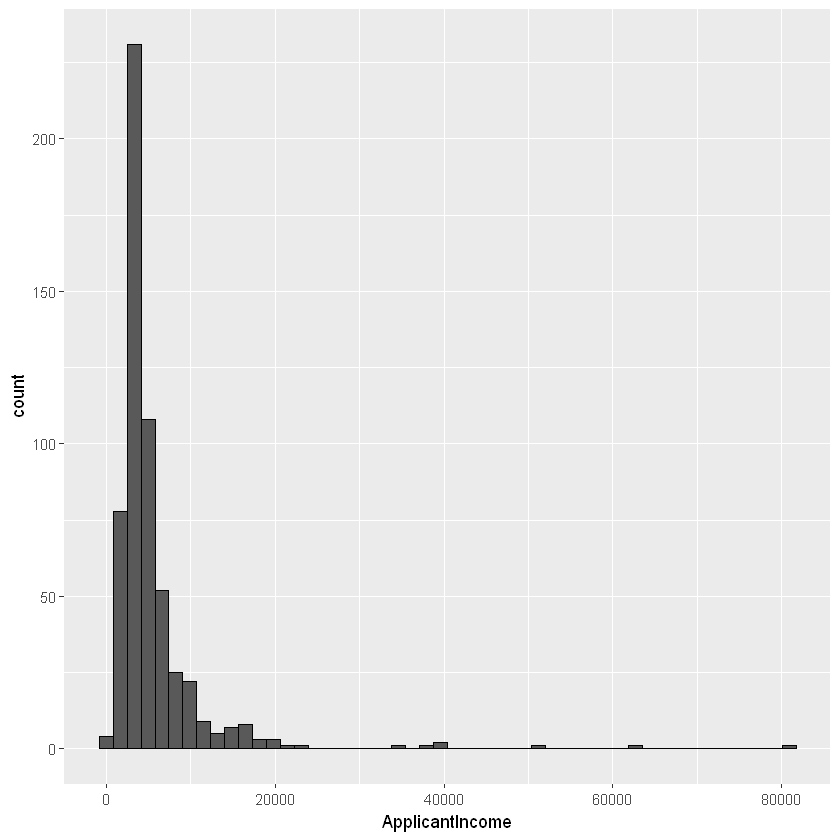

In [10]:
ggplot(data=train,aes(x=ApplicantIncome))+geom_histogram(bins=50,color='black')

'''There are few extreme values thats why we have a bin of 50.'''

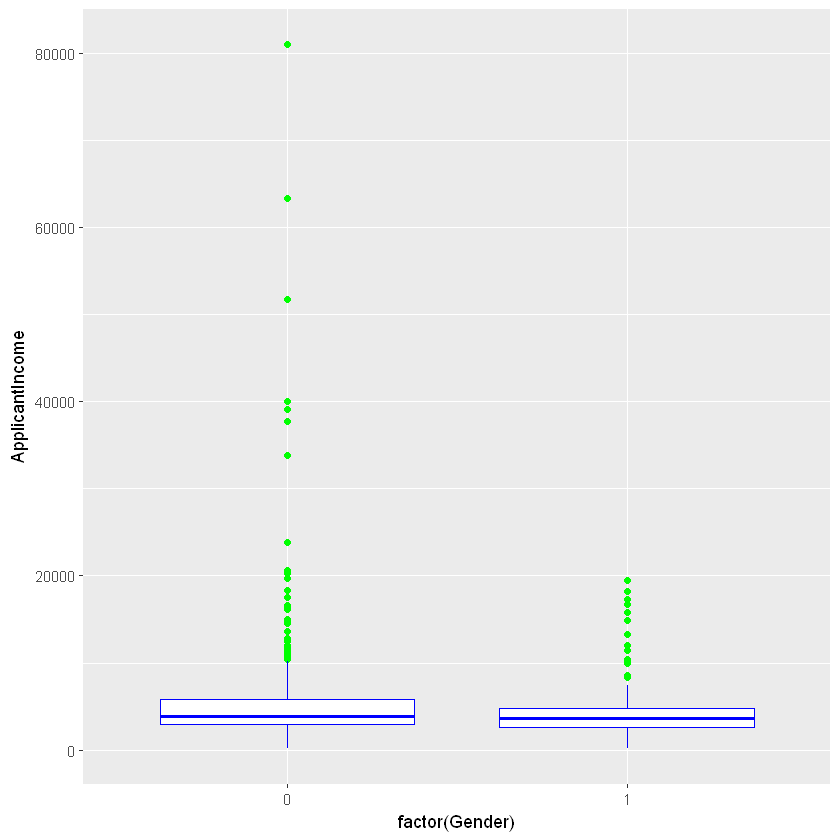

In [11]:
ggplot(data=train,aes(y=ApplicantIncome,x=factor(Gender),na.rm=TRUE))+geom_boxplot(color='blue',outlier.color='green')


#### Boxplot showing variation of  income with gender

This boxplot shows that there are lot of outliers values in data.This could happen as there is lot of income disparity in society.

Now we can segregate the values by education level

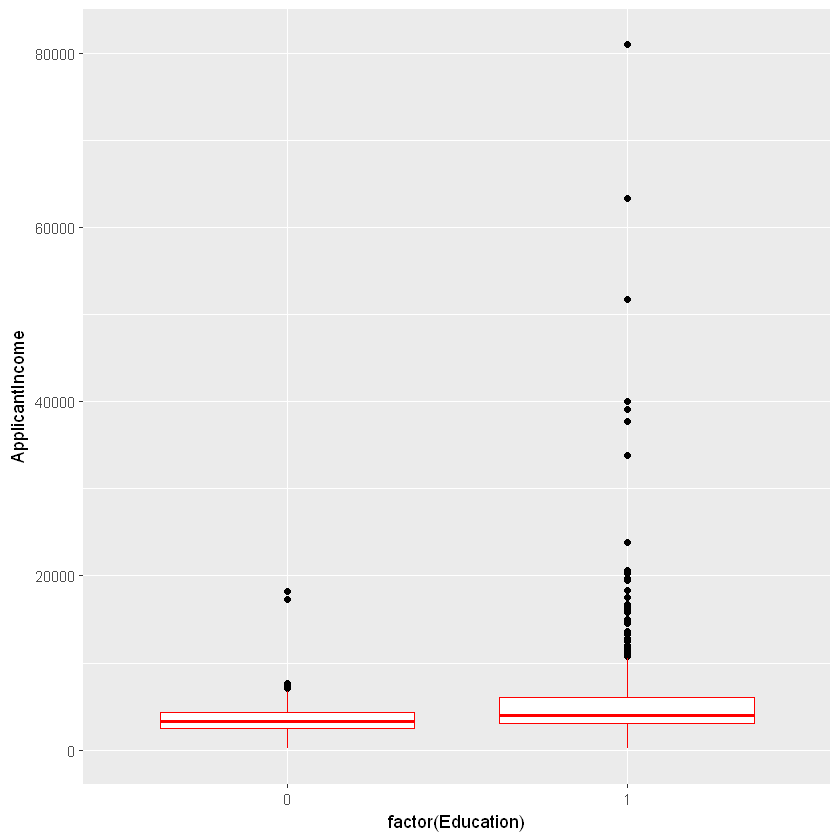

In [12]:
ggplot(data=train,aes(y=ApplicantIncome,x=factor(Education),na.rm=TRUE))+geom_boxplot(color='red',outlier.color='black')


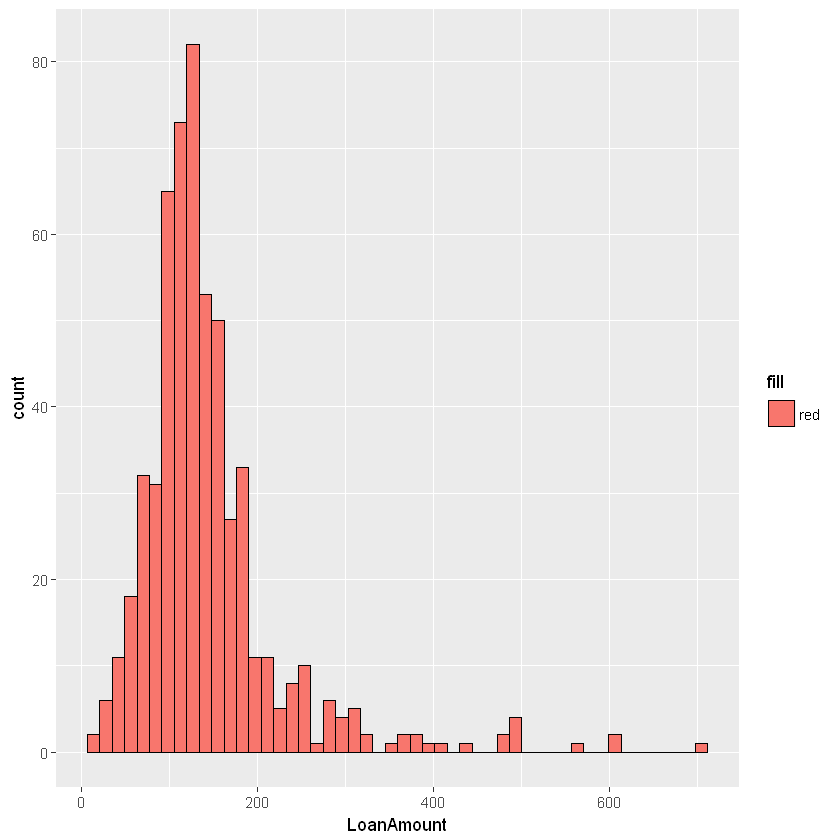

In [13]:
 ggplot(data=train,aes(x=LoanAmount,fill='red'))+geom_histogram(bins=50,color='black')


# Categorical variable analysis

We will analyze the categorical variable like credit history using aggregation(pivot table in MS excel)

In [14]:
aggdata2=aggregate(Loan_Status~Credit_History,train,FUN=mean)

In [15]:
aggdata2

Credit_History,Loan_Status
0,0.07865169
1,0.79578947


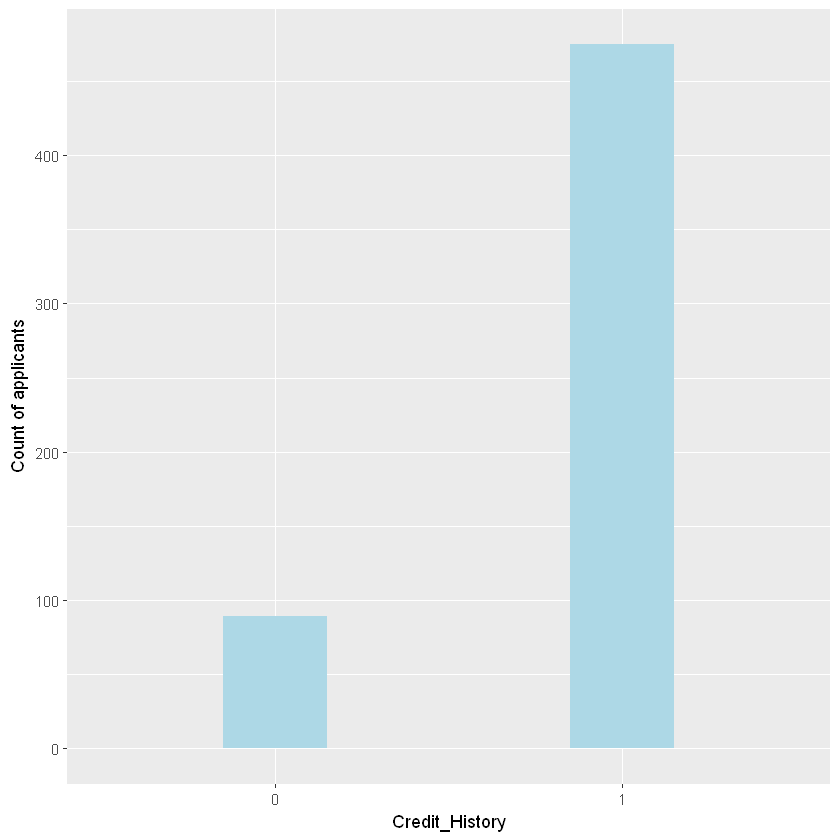

In [16]:
ggplot(data=train,aes(x=factor(Credit_History)))+geom_bar(width=0.3,fill="light blue")+labs(x="Credit_History",y="Count of applicants")

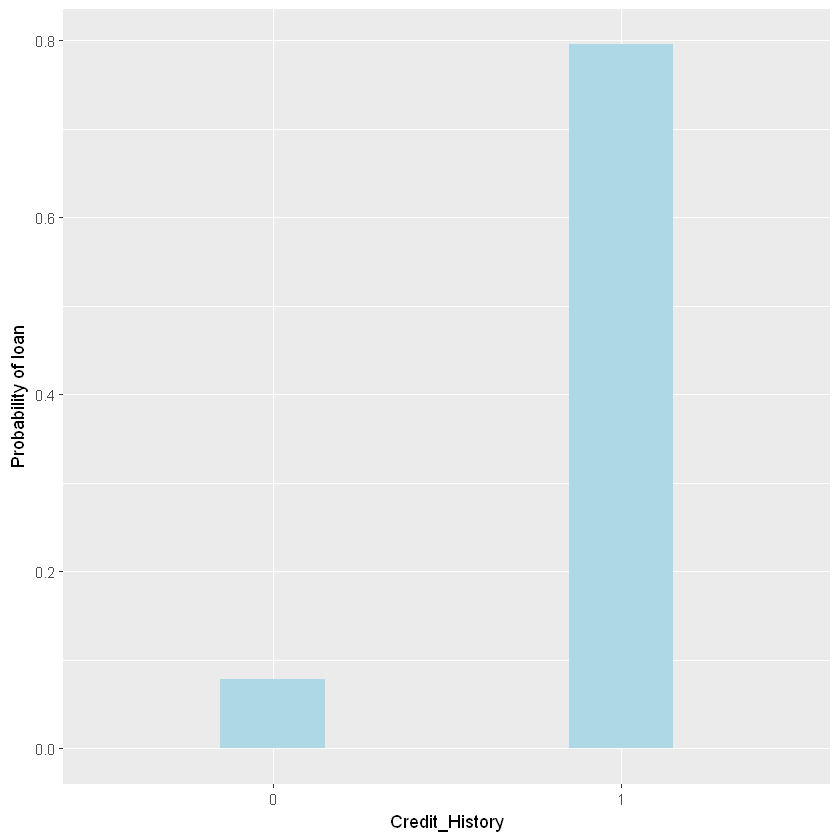

In [17]:
ggplot(data=aggdata2,aes(x=factor(Credit_History),y=Loan_Status))+geom_bar(stat="identity",width=0.3,fill="light blue")+labs(x="Credit_History",y="Probability of loan")

This means that the probability of getting loan is eight times more with a valid Credit history

We can take other categorical variables and plot them like above like Self_Employed,Married etc. While calculating Self_employed and married variables, It is found that they are not so important.